# Análise de dados com Python

## Tarefa:

Considere uma empresa de Telecomunicações que oferece vários serviçoes, dentre os principais: internet e telefone. 
Problema: A empresa está com um churn de mais de 26% de seus cliente, o que representa uma perda de milhões para a empresa.
O que a empresa precisa fazer para resolver o problema?

Base de dados: telecom_users.csv

## Passo-a-passo para a solução do problema:

* Passo 1: Importar a base de dados
* Passo 2: Visualizar a base de dados
    - Entender as informações disponíveis
    - Descobrir as inconsistências dos dados
* Passo 3: Tratamento da base de dados
    - Ex.: Valores vazios, valores que são numéricos e estão aparecendo como texto.
* Passo 4: Análise inicial (exploratória)
* Passo 5: Analisar as características dos clientes e relacionar aos motivos do cancelamento.


In [1]:
# Passo 1: Importar a base de dados

import pandas as pd

tabela = pd.read_csv('telecom_users.csv')

# Passo 2:
display(tabela)

Unnamed: 0   IDCliente     Genero  Aposentado Casado Dependentes  \
0           1869  7010-BRBUU  Masculino           0    Sim         Sim   
1           4528  9688-YGXVR   Feminino           0    Nao         Nao   
2           6344  9286-DOJGF   Feminino           1    Sim         Nao   
3           6739  6994-KERXL  Masculino           0    Nao         Nao   
4            432  2181-UAESM  Masculino           0    Nao         Nao   
...          ...         ...        ...         ...    ...         ...   
5981        3772  0684-AOSIH  Masculino           0    Sim         Nao   
5982        5191  5982-PSMKW   Feminino           0    Sim         Sim   
5983        5226  8044-BGWPI  Masculino           0    Sim         Sim   
5984        5390  7450-NWRTR  Masculino           1    Nao         Nao   
5985         860  4795-UXVCJ  Masculino           0    Nao         Nao   

      MesesComoCliente ServicoTelefone MultiplasLinhas ServicoInternet  ...  \
0                   72             Sim             Sim             Nao  ...   
1                   44             Sim             Nao           Fibra  ...   
2                   38             Sim             Sim           Fibra  ...   
3                    4             Sim             Nao             DSL  ...   
4                    2             Sim             Nao             DSL  ...   
...                ...             ...             ...             ...  ...   
5981                 1             Sim             Nao           Fibra  ...   
5982                23             Sim             Sim             DSL  ...   
5983                12             Sim             Nao             Nao  ...   
5984                12             Sim             Sim           Fibra  ...   
5985                26             Sim             Nao             Nao  ...   

     ServicoSuporteTecnico ServicoStreamingTV ServicoFilmes TipoContrato  \
0              SemInternet        SemInternet   SemInternet       2 anos   
1                      Nao                Sim           Nao       Mensal   
2                      Nao                Nao           Nao       Mensal   
3                      Nao                Nao           Sim       Mensal   
4                      Nao                Nao           Nao       Mensal   
...                    ...                ...           ...          ...   
5981                   Nao                Sim           Sim       Mensal   
5982                   Sim                Sim           Sim       2 anos   
5983           SemInternet        SemInternet   SemInternet       Mensal   
5984                   Nao                Sim           Sim       Mensal   
5985           SemInternet        SemInternet   SemInternet        Anual   

     FaturaDigital    FormaPagamento ValorMensal TotalGasto Churn  Codigo  
0              Nao     CartaoCredito       24.10    1734.65   Nao     NaN  
1              Sim     CartaoCredito       88.15     3973.2   Nao     NaN  
2              Sim  DebitoAutomatico       74.95    2869.85   Sim     NaN  
3              Sim  BoletoEletronico       55.90      238.5   Nao     NaN  
4              Nao  BoletoEletronico       53.45      119.5   Nao     NaN  
...            ...               ...         ...        ...   ...     ...  
5981           Sim  BoletoEletronico       95.00         95   Sim     NaN  
5982           Sim     CartaoCredito       91.10     2198.3   Nao     NaN  
5983           Sim  BoletoEletronico       21.15     306.05   Nao     NaN  
5984           Sim  BoletoEletronico       99.45    1200.15   Sim     NaN  
5985           Nao     CartaoCredito       19.80      457.3   Nao     NaN  

[5986 rows x 23 columns]

In [2]:
# Passo 2 e passo 3:
# 1) Coluna unnamed é inútil: deletar
tabela = tabela.drop('Unnamed: 0', axis=1) # axis = 0 (linha), axis = 1 (coluna)
display(tabela)

IDCliente     Genero  Aposentado Casado Dependentes  MesesComoCliente  \
0     7010-BRBUU  Masculino           0    Sim         Sim                72   
1     9688-YGXVR   Feminino           0    Nao         Nao                44   
2     9286-DOJGF   Feminino           1    Sim         Nao                38   
3     6994-KERXL  Masculino           0    Nao         Nao                 4   
4     2181-UAESM  Masculino           0    Nao         Nao                 2   
...          ...        ...         ...    ...         ...               ...   
5981  0684-AOSIH  Masculino           0    Sim         Nao                 1   
5982  5982-PSMKW   Feminino           0    Sim         Sim                23   
5983  8044-BGWPI  Masculino           0    Sim         Sim                12   
5984  7450-NWRTR  Masculino           1    Nao         Nao                12   
5985  4795-UXVCJ  Masculino           0    Nao         Nao                26   

     ServicoTelefone MultiplasLinhas ServicoInternet ServicoSegurancaOnline  \
0                Sim             Sim             Nao            SemInternet   
1                Sim             Nao           Fibra                    Nao   
2                Sim             Sim           Fibra                    Nao   
3                Sim             Nao             DSL                    Nao   
4                Sim             Nao             DSL                    Sim   
...              ...             ...             ...                    ...   
5981             Sim             Nao           Fibra                    Sim   
5982             Sim             Sim             DSL                    Sim   
5983             Sim             Nao             Nao            SemInternet   
5984             Sim             Sim           Fibra                    Nao   
5985             Sim             Nao             Nao            SemInternet   

      ... ServicoSuporteTecnico ServicoStreamingTV ServicoFilmes TipoContrato  \
0     ...           SemInternet        SemInternet   SemInternet       2 anos   
1     ...                   Nao                Sim           Nao       Mensal   
2     ...                   Nao                Nao           Nao       Mensal   
3     ...                   Nao                Nao           Sim       Mensal   
4     ...                   Nao                Nao           Nao       Mensal   
...   ...                   ...                ...           ...          ...   
5981  ...                   Nao                Sim           Sim       Mensal   
5982  ...                   Sim                Sim           Sim       2 anos   
5983  ...           SemInternet        SemInternet   SemInternet       Mensal   
5984  ...                   Nao                Sim           Sim       Mensal   
5985  ...           SemInternet        SemInternet   SemInternet        Anual   

     FaturaDigital    FormaPagamento ValorMensal TotalGasto  Churn Codigo  
0              Nao     CartaoCredito       24.10    1734.65    Nao    NaN  
1              Sim     CartaoCredito       88.15     3973.2    Nao    NaN  
2              Sim  DebitoAutomatico       74.95    2869.85    Sim    NaN  
3              Sim  BoletoEletronico       55.90      238.5    Nao    NaN  
4              Nao  BoletoEletronico       53.45      119.5    Nao    NaN  
...            ...               ...         ...        ...    ...    ...  
5981           Sim  BoletoEletronico       95.00         95    Sim    NaN  
5982           Sim     CartaoCredito       91.10     2198.3    Nao    NaN  
5983           Sim  BoletoEletronico       21.15     306.05    Nao    NaN  
5984           Sim  BoletoEletronico       99.45    1200.15    Sim    NaN  
5985           Nao     CartaoCredito       19.80      457.3    Nao    NaN  

[5986 rows x 22 columns]

In [3]:
# 2) Aposentado: 0 - False. 1 - True
# 3) Ver se tem coluna que era pra ser numero e está sendo reconhecida como texto
# 4) Coluna "código": valor Nan (vazio)

# Passo 3:
# 3)
print(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IDCliente               5986 non-null   object 
 1   Genero                  5986 non-null   object 
 2   Aposentado              5986 non-null   int64  
 3   Casado                  5986 non-null   object 
 4   Dependentes             5985 non-null   object 
 5   MesesComoCliente        5986 non-null   int64  
 6   ServicoTelefone         5986 non-null   object 
 7   MultiplasLinhas         5986 non-null   object 
 8   ServicoInternet         5986 non-null   object 
 9   ServicoSegurancaOnline  5986 non-null   object 
 10  ServicoBackupOnline     5986 non-null   object 
 11  ProtecaoEquipamento     5986 non-null   object 
 12  ServicoSuporteTecnico   5986 non-null   object 
 13  ServicoStreamingTV      5986 non-null   object 
 14  ServicoFilmes           5986 non-null   

In [4]:
# Nesse exemplo, entenda "object" como texto. Problemas identificados: Total gasto
tabela['TotalGasto'] = pd.to_numeric(tabela['TotalGasto'], errors = 'coerce') # Se houver algum texto, ou seja, não pode ser transformado em número, deixe-o vazio
# print(tabela.info()) para verificar se a modificação teve sucesso.

# 4: colunas vazias (Resolver primeiro colunas vazias e só depois linhas vazias)
# dropna: Exclusão automática de células vazias. Com drop, precisa especificar coluna
# how: excluir coluna com PELO MENOS (how = 'any') um valor vazio ou excluir coluna com TODOS (how = 'all') os valores vazios?
# Parâmetro: thresh = 20 : exclui todas as linhas/colunas que tenham 20 ou mais valores vazios
tabela = tabela.dropna(how = 'all', axis=1)
tabela = tabela.dropna(how = 'any', axis = 0) # excluindo linhas que tenham algum valor vazio, pois vai atrapalhar a análise dos dados


In [5]:
# Passo 4: Como estão os cancelamentos? Coluna "churn"
display(tabela['Churn'].value_counts())

# Quanto é isso em % ?
display(tabela['Churn'].value_counts(normalize=True))

Nao    4387
Sim    1587
Name: Churn, dtype: int64

Nao    0.734349
Sim    0.265651
Name: Churn, dtype: float64

In [6]:
# Passo 5:

import plotly.express as px

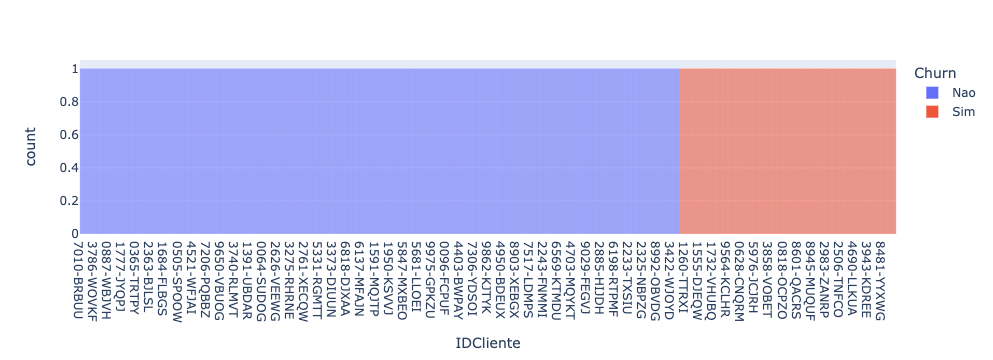

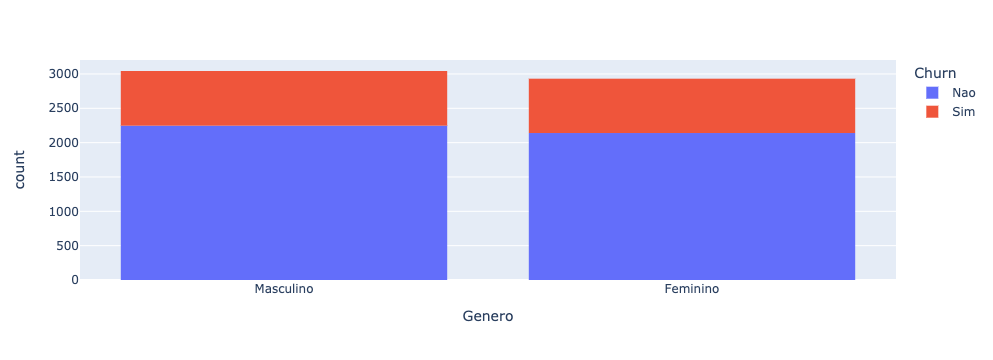

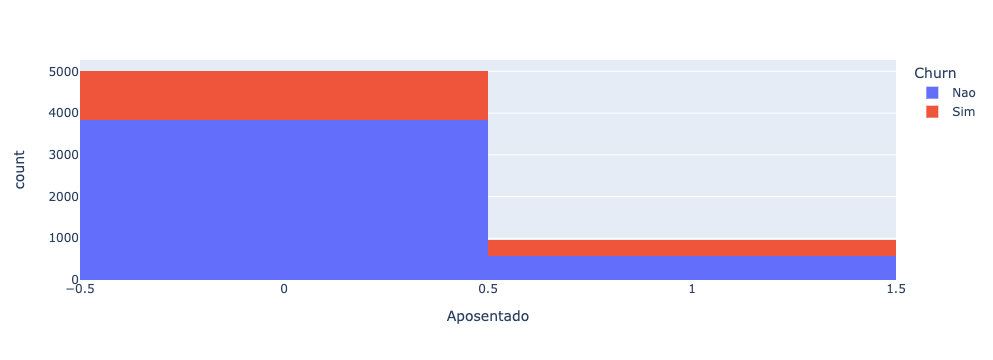

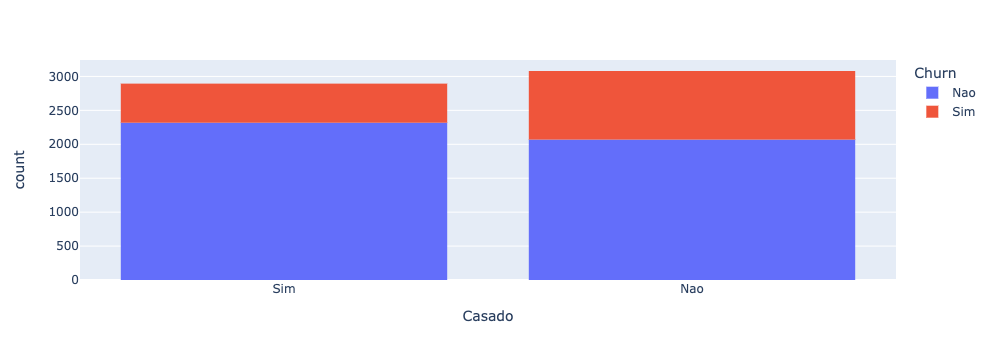

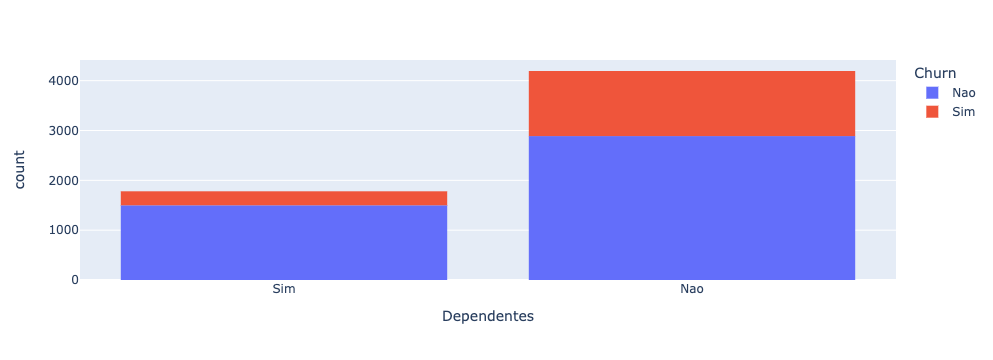

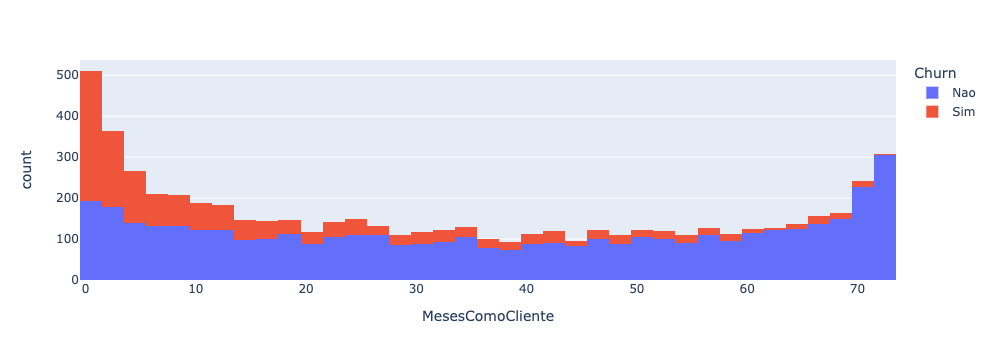

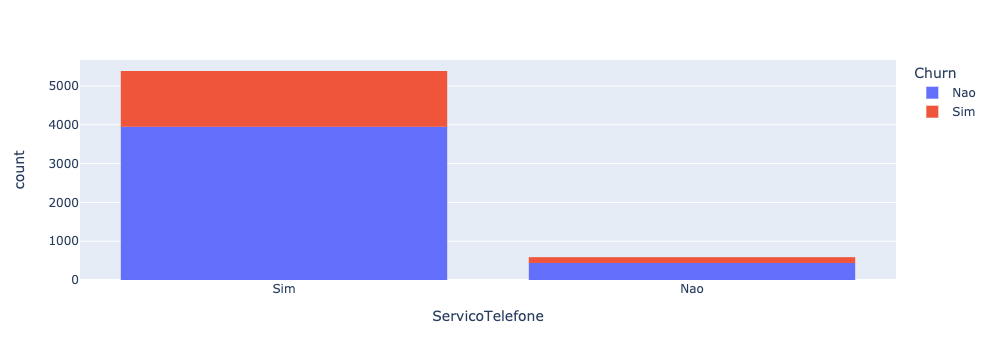

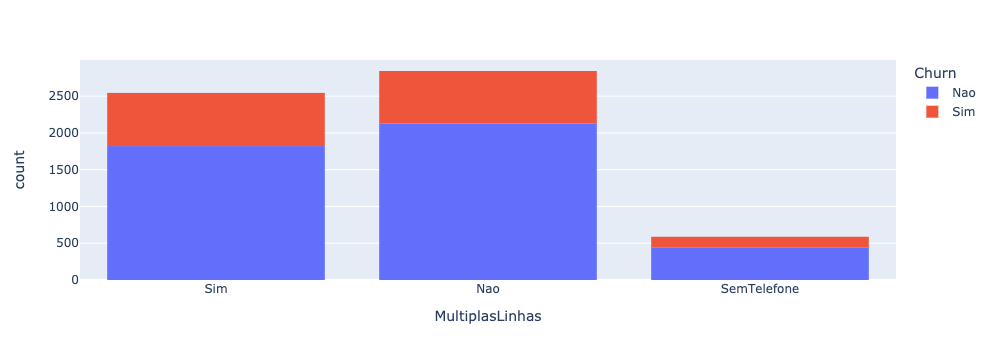

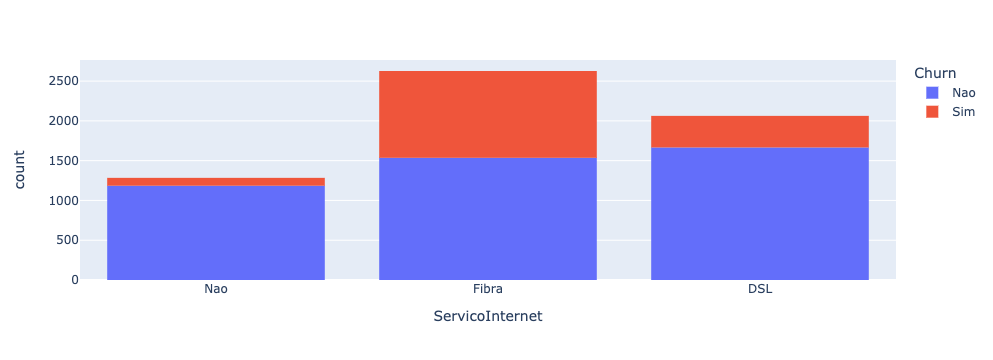

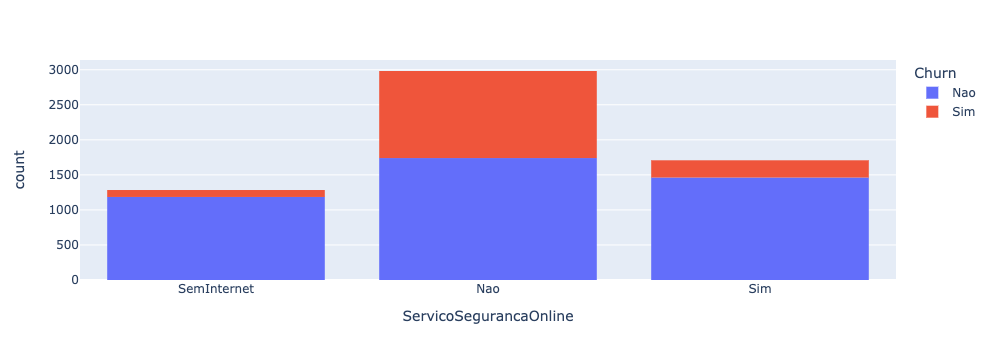

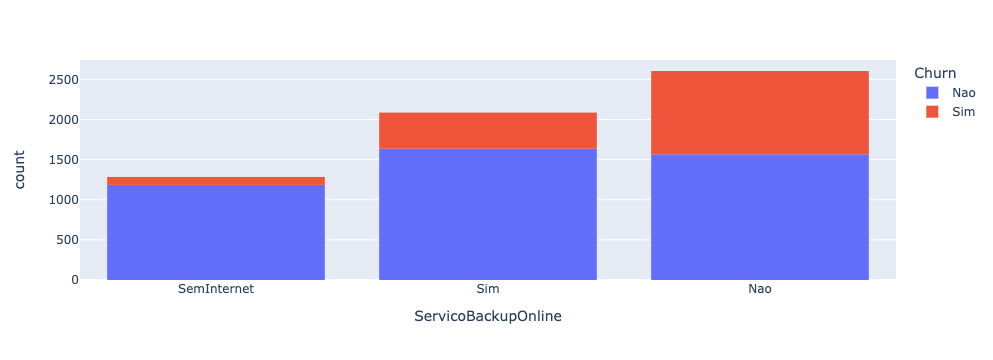

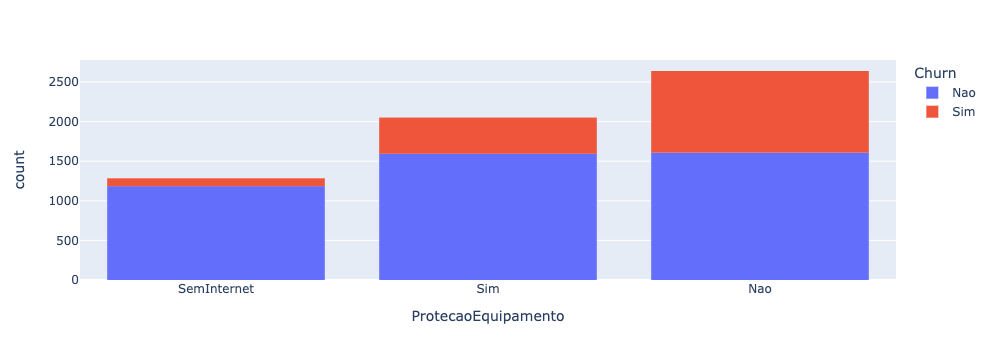

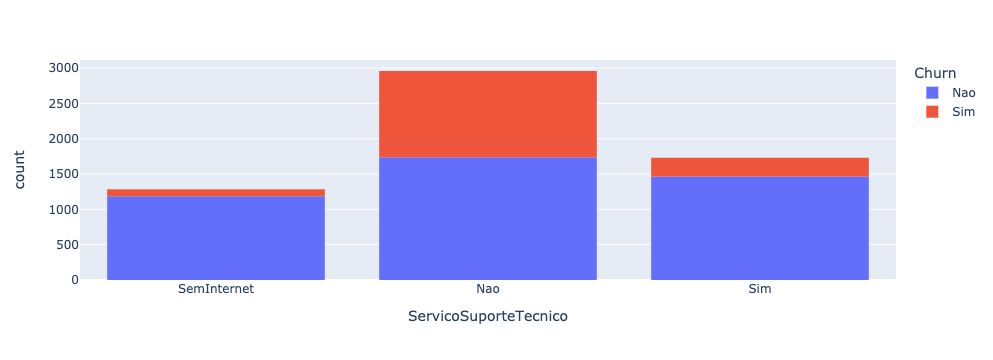

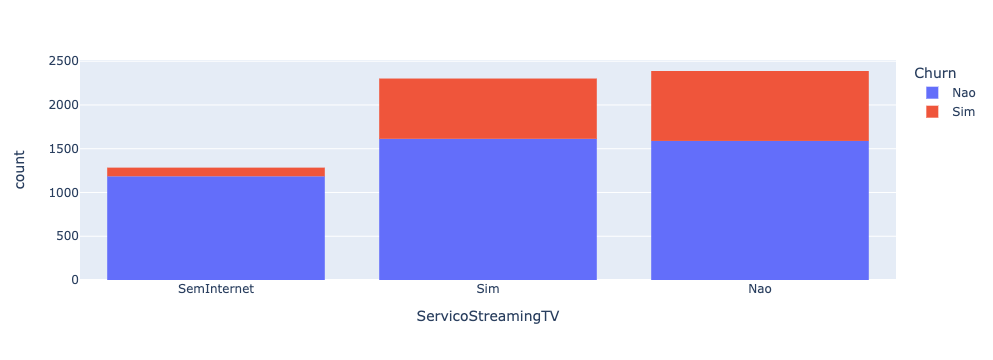

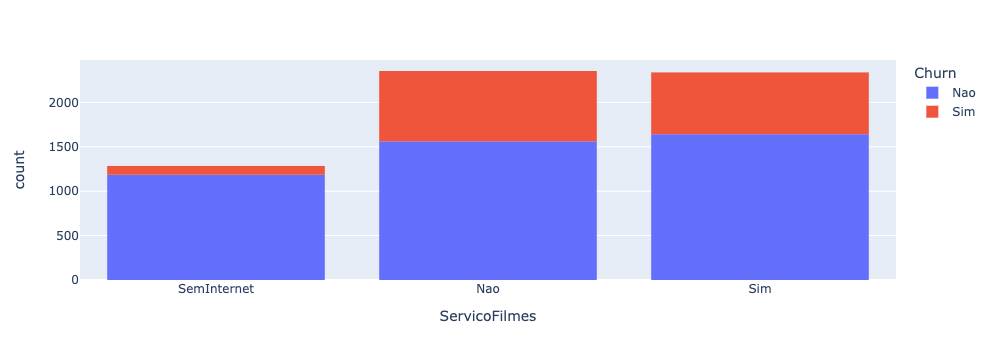

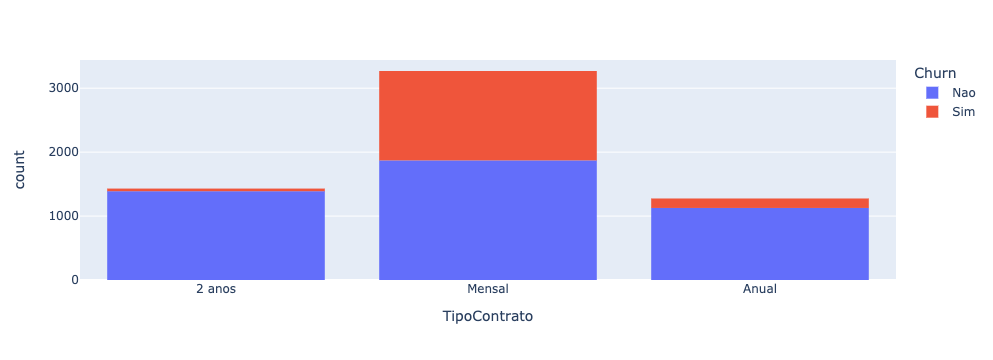

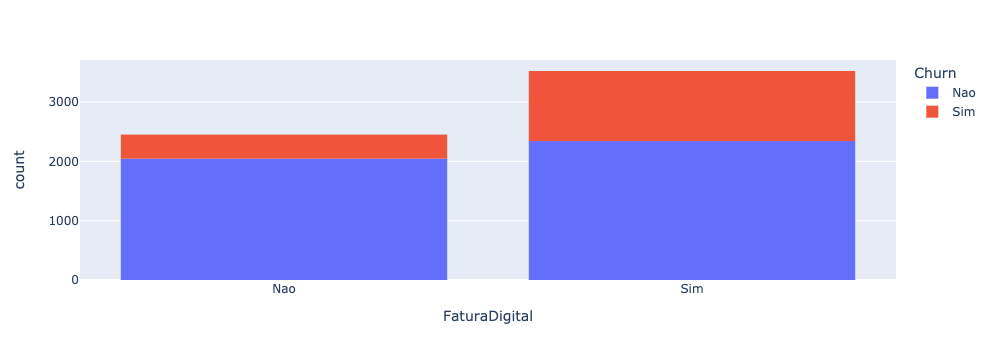

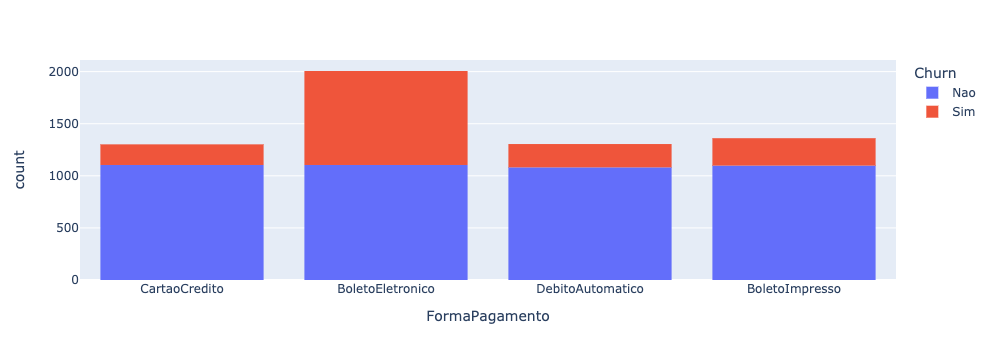

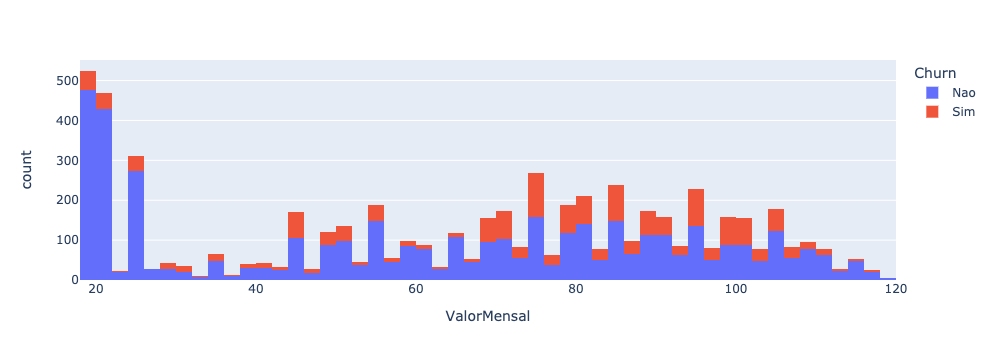

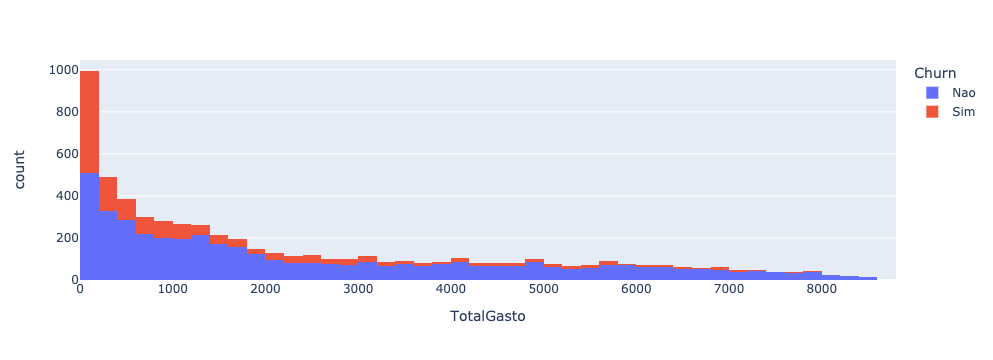

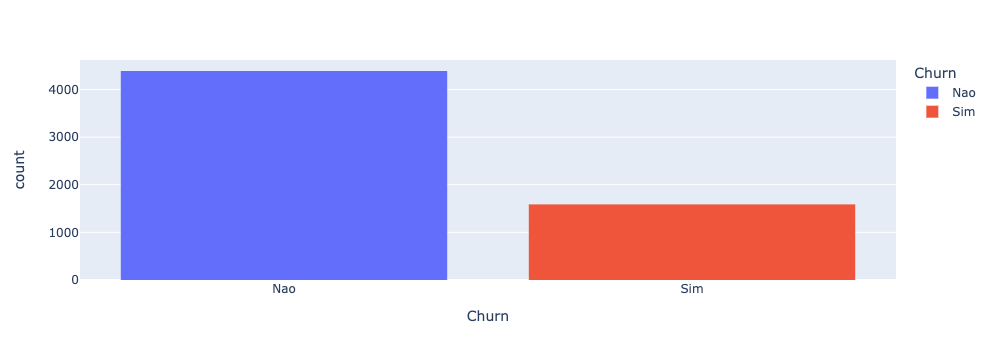

In [8]:
# Criação do gráfico para visualização das informações:
for coluna in tabela: #For numa tabela sempre vai percorrer as colunas. Para percorrer as linhas, seria: For linhas in tabela.index (index = linha)
    grafico = px.histogram(tabela, x= coluna, color='Churn')
    grafico.show()

# Conclusões:

### Clientes com família tendem a cancelar menos

### Nos primeiros 2 meses, mais clientes cancelam do que permanecem com o serviço. Problemas de retenção de clientes nos primeiros meses.
    * Possível solução: programa de incentivo à permanência
    * Talvez haja falhas ao traçar o perfil dos novos clientes. Rever programa de captação de clientes.
    
### Identificado grande número de cancelamentos para o serviço de fibra ótica. Verificar possível problema no serviço de fibra ótica.

### Quanto mais servi;cos o cliente tem, menor a chance dele cancelar.
    * Clientes que não tem o serviço de segurança online cancelam mais
    * Clientes que não tem o serviço de proteção ao equipamento cancelam mais
    * Clientes que não tem o serviço de suporte técnico cancelam mais
    * Possível solução: Criação de combos, incentivos/bonificações para quem tem mais serviços
  
### Contrato: Clientes que tem prazo de contrato menor (contrato mensal) cancelam mais dos que tem contrato anual.
    * Possível solução: descontos em contratos anuais

### Forma de Pagamento: Aqueles clientes que pagam por boleto eletrônico cancelam em maior número do que aqueles que optam por outras formas de pagamento.
    * Possível solução: Programa de incentivo ao débito automático.